### Objectives
YWBAT
* differentiate between distributions with high type I and type II error rates
* interpret effect size between two distributions
* explain how effect size effects type I and type II error rates

### Outline
* Define type I and type II errors
* Calculate effect size on a distribution
* Have a discussion
* Activity

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [9]:
# Notes

# 1 Sample TTest
mu = 11
x = np.random.normal(13, 4, 100)
print(stats.ttest_1samp(x, mu))

# 2 Sample TTest

x = np.random.normal(13, 4, 100)
y = np.random.normal(11, 4, 100)

print(stats.ttest_ind(x, y, equal_var=True))

Ttest_1sampResult(statistic=4.432016304730241, pvalue=2.4156799388245814e-05)
Ttest_indResult(statistic=2.4830766885636577, pvalue=0.01385641863432184)


# Type I & Type II Error

![](images/typei-typeii-error.gif)

### Scenario 
- We're testing 2 groups, group_one and group_two.  
- One group will be given a 150mg dose of caffeine and the other will be given nothing. 
- Each person will then perform a deadlift set for max reps. 
- After the study is conducted, we'll then run the results through a hypothesis test

In [3]:
# calculate the probability of making a type I error in the following example

group_one = np.random.normal(loc=20, scale=5, size=2000) # non caffeinated
group_two = np.random.normal(loc=22, scale=4, size=2000) # caffeinated 

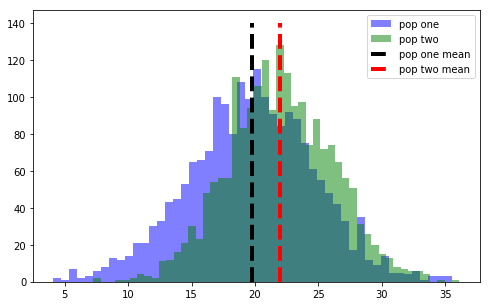

In [4]:
plt.figure(figsize=(8, 5))
plt.hist(group_one, bins=50, label='pop one', color='b', alpha=0.5)
plt.hist(group_two, bins=50, label='pop two', color='g', alpha=0.5)

plt.vlines(group_one.mean(), colors='k', label='pop one mean', linestyle='dashed', linewidth=4, ymin=0, ymax=140)
plt.vlines(group_two.mean(), colors='r', label='pop two mean', linestyle='dashed', linewidth=4, ymin=0, ymax=140)

plt.legend()
plt.show()

**Hypothesis Test**
* H0: mu1 = mu2, the mean reps between our two groups is the same
* HA: mu1 != mu2, the mean reps between our two groups is not the same

In [5]:
# hypothesis test
t, p = stats.ttest_ind(group_one, group_two)
print(f"Ind TTest Results\n t={t}, p={p}")

Ind TTest Results
 t=-15.321438383705106, p=1.559620832190731e-51


### Test Summary
- Pvalue ~ 0.00
- Reject the null hypothesis

What do we notice?
- there is a difference in the means! 
- type I error? 
- type II error? 

# Effect Size/Cohen's D

![](images/effect-size.jpg)

Cohen's D Formula for One Samp

**Given**
- mu - mean of the distribution
- mu0 - mean that the distribution is being compared to
- sigma - standard deviation of distribution

$$\text{Cohen's D} = \frac{\mu-\mu_0}{\sigma}$$

In [15]:
# 'borrowed' from stackoverflow 

from numpy import std, mean, sqrt

def cohen_d_one_samp(x, mu):
    """
    your code goes here
    """
    return (x.mean() - mu) / x.std(ddof=1)
    
def cohen_d_two_samp(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

In [7]:
cohen_d_two_samp(group_two, group_one)

0.4845064232243697

### Summary
After conducting a hypothesis test on our data, we see that with a pvalue = 0.00
* The mean reps between two groups are different

An effect size of 0.43, shows that the effect is fairly small, thus we have a lot of room of type I and type II error. 

# Activity

For each scenario, please do the following
- Complete the function `cohen_d_one_samp` above
- Choose and perform the correct hypothesis test
    - Choose your test
    - State your null and alternative hypotheses
- Calculate the effect size
- Write an overall summary
- Use the dataframe below to get the data for each question

In [10]:
df = pd.read_csv("effect_size_data.csv")
df.head()

,q1_group_one,q2_control,q2_experimental
0,12.071275,9.967142,-11.375891
1,6.861121,3.617357,-8.722593
2,13.833168,11.476885,-11.962100
3,11.606785,20.230299,-9.539808
4,11.306064,2.658466,-17.468073


# q1
A goliath of a company, Whamazon, recorded the mean number of minutes its employees can type without making a mistake. After recording this data, Whamazon execs decided to give a small experimental group a pay bump if they practiced typing everyday for 30 minutes. They then recorded the results of the experimental group.

Your task is to determine if the pay bump and practice caused a difference in means between the experimental group the initial recording. You must also calculate the effect and write a summary

In [11]:
control_mean = 10

group_one = df['q1_group_one']

Hypothesis Test Setup
- Hypothesis Test to use: 
- H0: experimental_mean = 10
- HA: experimental_mean != 10

In [12]:
# test goes here
stats.ttest_1samp(group_one, 10)

Ttest_1sampResult(statistic=24.028071455026097, pvalue=2.746899700268025e-112)

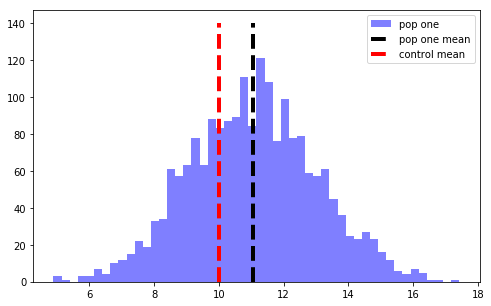

In [60]:
# plotting the distribution with the control mean

plt.figure(figsize=(8, 5))
plt.hist(group_one, bins=50, label='pop one', color='b', alpha=0.5)

plt.vlines(group_one.mean(), colors='k', label='pop one mean', linestyle='dashed', linewidth=4, ymin=0, ymax=140)
plt.vlines(control_mean, colors='r', label='control mean', linestyle='dashed', linewidth=4, ymin=0, ymax=140)

plt.legend()
plt.show()

In [16]:
# Calculate Effect Size
effect_size = cohen_d_one_samp(group_one, 10)
effect_size

0.5372840114166063

### q1 Summary
Your summary goes here

From our hypothesis test, we know the means are different. 

Our effect size is 0.53 which is a medium effect.  So there is an effect, but it isn't a large effect. 

-----
-----

# q2
Whamazon, after seeing some success in improving typing efficiency for their employees, have decided to try and increase the number of employees that show up on time. 

They setup 2 groups as follows

Control Group: 
Record their time of arrival everyday using their badges. 


Experimental Group: 
Send an email to this group, letting them know that free coffee and fruit will be available everyday 15 minutes before they clock in).  Record their time of arrival everyday using their badges. 

The data was converted to minutes that employees arrived after 8 am.

In [17]:
group_one = df['q2_control']
group_two = df['q2_experimental']

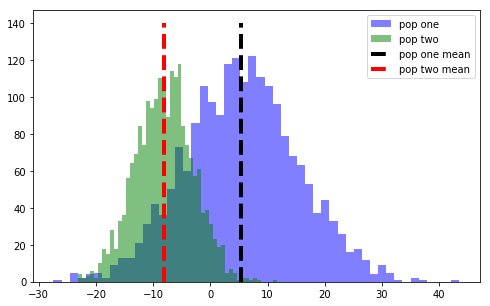

In [18]:
plt.figure(figsize=(8, 5))
plt.hist(group_one, bins=50, label='pop one', color='b', alpha=0.5)
plt.hist(group_two, bins=50, label='pop two', color='g', alpha=0.5)

plt.vlines(group_one.mean(), colors='k', label='pop one mean', linestyle='dashed', linewidth=4, ymin=0, ymax=140)
plt.vlines(group_two.mean(), colors='r', label='pop two mean', linestyle='dashed', linewidth=4, ymin=0, ymax=140)

plt.legend()
plt.show()

**Hypothesis Test Setup**


In [19]:
# hypothesis test here
stats.ttest_ind(group_one, group_two)

Ttest_indResult(statistic=54.374479345380344, pvalue=0.0)

### Effect Size Calculation

In [21]:
cohen_d_two_samp(group_one, group_two)

1.7194720131718324

### Summary
- 
- 


-----
-----

### Discussion questions
- What changes the effect size between two sample groups? 
    - The difference between the mean and the variance of each group
    - If two distributions overlap less, the effect size increases
- If your effect size increases, then your type I error rate has
    - stays the same, because type I error is only relevant to H0 distribution
- If your effect size increases, then your type II error rate
    - decreased. 